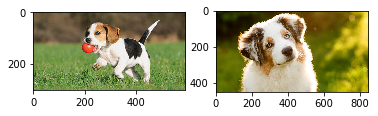

In [85]:
import cv2, numpy as np, itertools as it
from matplotlib.image import imread
import matplotlib.pyplot as plt

fichiers = ['data/dog1.jpg', 'data/dog2.jpg']

images = [{'image': imread(fichier).tolist(),
            'b_boxes': [(50, 55, 200, 400)], 
            'labels' : [10]} for fichier in fichiers]

fig, ax = plt.subplots(nrows=1, ncols=len(images))
for image, col in zip(images, range(len(images))):
    img = np.array(image["image"], dtype=np.uint8)
    ax[col].imshow(img)

In [86]:
def gen_1(imgs, vals):
    for img, val in it.product(imgs, vals):
        yield img

In [87]:
def gen_2(imgs, vals):
    for img, val in it.product(imgs, vals):
        img_ = np.array(img["image"], dtype=np.float64)
        img_ = np.dstack([img_[:,:,0], img_[:,:,0] , img_[:,:,0]]) / val 
        img["image"] = img_.tolist()
        yield img

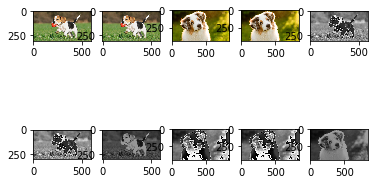

In [88]:
images_pp = it.chain(gen_1(images, [0.8, 1]),
                     gen_2(images, [0.8, 1, 2]))
# Au final, on a 2 * (2 + 3) = 10 images
fig, ax = plt.subplots(nrows=2, ncols=5)
for idx, image in enumerate(images_pp):
    i = idx // 5 # Get subplot row
    j = idx % 5
    img = np.array(image["image"], dtype=np.uint8)
    ax[i,j].imshow(img)

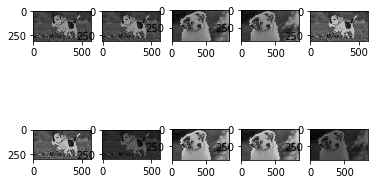

In [89]:
images_pp = it.chain(gen_1(images, [0.8, 1]),
                     gen_2(images, [0.8, 1, 2]))
# Au final, on a 2 * (2 + 3) = 10 images
fig, ax = plt.subplots(nrows=2, ncols=5)
for idx, image in enumerate(images_pp):
    i = idx // 5 # Get subplot row
    j = idx % 5
    img = np.array(image["image"], dtype=np.uint8)
    ax[i,j].imshow(img)

## Plus sophistiqué à l'adresse:
https://brett.is/writing/about/generator-pipelines-in-python/